In [1]:
# Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import OrderedDict
import sklearn
import statsmodels
import scipy
import xgboost
%matplotlib inline



# Library Version

print('pandas: %s' % pd.__version__)
print('numpy: %s' % np.__version__)
import matplotlib as mt
print('matplotlib: %s' % mt.__version__)
print('seaborn: %s' % sns.__version__)
print('sklearn: %s' % sklearn.__version__)
#print('imblearn: %s' % imblearn.__version__)
print('statmodels: %s' % statsmodels.__version__)
print('scipy: %s' % scipy.__version__)
print('XGBoost: %s' % xgboost.__version__)

pandas: 0.23.4
numpy: 1.18.5
matplotlib: 3.0.0
seaborn: 0.9.0
sklearn: 0.22.2.post1
statmodels: 0.9.0
scipy: 1.1.0
XGBoost: 1.1.1


C:\Users\Nandhu\miniconda3\envs\study\lib\site-packages\xgboost\__init__.py:29: FutureWarning: Python 3.5 support is deprecated; XGBoost will require Python 3.6+ in the near future. Consider upgrading to Python 3.6+.
  FutureWarning)


In [2]:
test=pd.read_csv('test.csv')

In [3]:
train=pd.read_csv('train.csv')

In [4]:
print('train dataset shape:{}, \ntest dataset shape: {}'.format(train.shape,test.shape))

train dataset shape:(891, 12), 
test dataset shape: (418, 11)


In [5]:
gender=pd.read_csv('gender_submission.csv')

In [6]:
gender.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [7]:
train_copy=train.copy()
test_copy=test.copy()

## Missing data handling

In [8]:
train_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


<h3>Missing data in Train Dataset</h3>

> * Column **'Age'** have **177** missing values,

> * Column **'Cabin'** have **687 (77.10%)** missing values. We cant fill the missing values. Because column 'Cabin' indicates cabin number of passenger.

> * Column **'Embarked'** have **2** missing values.

Column **'Age'** is indicates ages of the passenger. so filling missing values with **mean()** is not an appropriate solution,
and it affects the distribution of the age in dataset. The solution sholdn't affect the distribution of ages. Then we have to calculate the **current distribution** ages from **present values (714)**. Then scale that distribution to **entire dataset (891)** by filling missing values.

In [9]:
# Calculating the Current distribution of ages(714).

current_dist_train=train_copy['Age'].value_counts()#.head()


# Scaling the distribution to full dataset. In meantime, converting scaled distribution into missing distribution
# (scaled distribution [(x/714)*819+$] - present(x) )
# $ helps to build the perfect fitting missing distribution

missing_dist_train=current_dist_train.apply(lambda x:round(((x/714)*891)+0.01265-x))

missing_dist_train.sum()


180

In [10]:
missing_dist_train_o_dict=OrderedDict(missing_dist_train)
missing_data_train_age_dict=dict(train_copy['Age'].isna())
#train['Age'].value_counts()

In [11]:
missing_dist_train_o_dict.items()

odict_items([(24.0, 7), (22.0, 7), (18.0, 6), (19.0, 6), (30.0, 6), (28.0, 6), (21.0, 6), (25.0, 6), (36.0, 5), (29.0, 5), (32.0, 4), (27.0, 4), (35.0, 4), (26.0, 4), (16.0, 4), (31.0, 4), (20.0, 4), (33.0, 4), (23.0, 4), (34.0, 4), (39.0, 3), (17.0, 3), (42.0, 3), (40.0, 3), (45.0, 3), (38.0, 3), (50.0, 2), (2.0, 2), (4.0, 2), (47.0, 2), (44.0, 2), (48.0, 2), (54.0, 2), (9.0, 2), (1.0, 2), (51.0, 2), (52.0, 2), (14.0, 2), (3.0, 2), (49.0, 2), (41.0, 2), (37.0, 2), (15.0, 1), (43.0, 1), (58.0, 1), (11.0, 1), (62.0, 1), (60.0, 1), (8.0, 1), (56.0, 1), (5.0, 1), (46.0, 1), (65.0, 1), (7.0, 1), (6.0, 1), (61.0, 1), (55.0, 1), (28.5, 1), (71.0, 1), (59.0, 1), (63.0, 1), (0.83, 1), (30.5, 1), (70.0, 1), (57.0, 1), (0.75, 1), (13.0, 1), (10.0, 1), (64.0, 1), (40.5, 1), (32.5, 1), (45.5, 1), (20.5, 0), (24.5, 0), (0.67, 0), (14.5, 0), (0.92, 0), (74.0, 0), (34.5, 0), (80.0, 0), (12.0, 0), (36.5, 0), (53.0, 0), (55.5, 0), (70.5, 0), (66.0, 0), (23.5, 0), (0.42, 0)])

In [12]:
try:
    z=[]
    for i,j in missing_data_train_age_dict.items():
        if j:
            z.append(i)
    k=0
    for i,j in missing_dist_train_o_dict.items():
        count=0
        while j>count:
            train_copy['Age'][z[k]]=i
            k+=1
            count+=1
except IndexError:
    pass


C:\Users\Nandhu\miniconda3\envs\study\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [13]:
train_copy['Age'].isna().sum()

0

C:\Users\Nandhu\miniconda3\envs\study\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Nandhu\miniconda3\envs\study\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


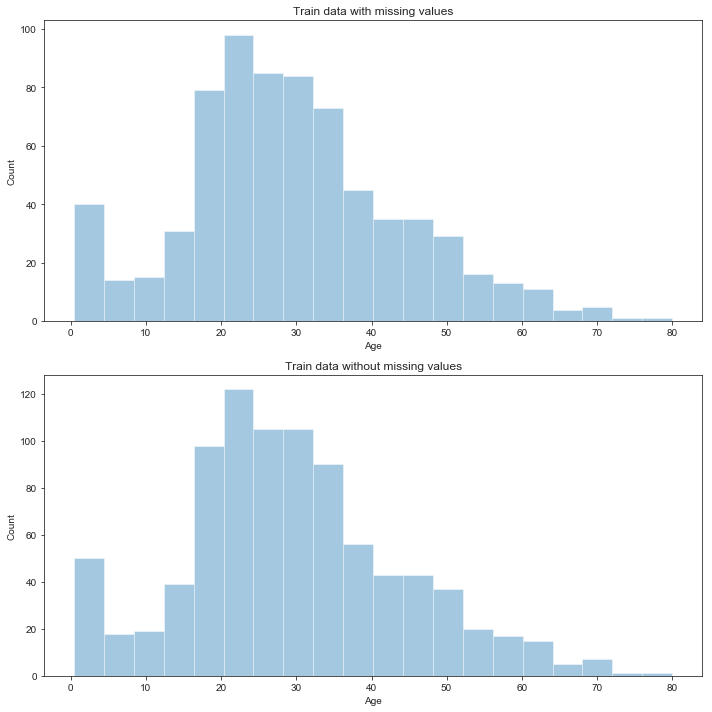

In [14]:
sns.set_style('ticks')
fig,(ax1,ax2)=plt.subplots(2,1,figsize=(10,10))


sns.distplot(train['Age'],ax=ax1,bins=20,kde=False,)
ax1.set_title('Train data with missing values')
ax1.set_xlabel('Age')
ax1.set_ylabel('Count')


sns.distplot(train_copy['Age'],ax=ax2,bins=20,kde=False)
ax2.set_title('Train data without missing values')
ax2.set_xlabel('Age')
ax2.set_ylabel('Count')

plt.tight_layout()

Column **'Embarked'** indicates the boarding places the passengers. it have only two missing values.
It will be filled by most reapted value **'S'**

In [15]:
train_copy['Embarked'].fillna(value='S',inplace=True)

In [16]:
train_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


<h3>Missing data in test dataset</h3>

In [17]:
test_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


> * Column **'Age'** have **86** missing values,

> * Column **'Cabin'** have **326 (77.99%)** missing values. We cant fill the missing values. Because column 'Cabin' indicates cabin number of passenger.

> * Column **'Fare'** have **1** missing values.

In [18]:
# Calculating the Current distribution of ages(332).

current_dist_test=test_copy['Age'].value_counts()#.head()


# Scaling the distribution to full dataset. In meantime, converting scaled distribution into missing distribution
# (scaled distribution [(x/332)*418] - present(x) )

missing_dist_test=current_dist_test.apply(lambda x:(((x/332)*418)-x)).apply(lambda x:round(x))

missing_dist_test.sum()

86

In [19]:
missing_dist_test_o_dict=OrderedDict(missing_dist_test)
missing_data_test_age_dict=dict(test_copy['Age'].isna())


In [20]:
try:
    z=[]
    for i,j in missing_data_test_age_dict.items():
        if j:
            z.append(i)
    k=0
    for i,j in missing_dist_test_o_dict.items():
        count=0
        while j>count:
            test_copy['Age'][z[k]]=i
            k+=1
            count+=1
except IndexError:
    pass

C:\Users\Nandhu\miniconda3\envs\study\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [21]:
test_copy['Age'].isna().sum()

0

C:\Users\Nandhu\miniconda3\envs\study\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Nandhu\miniconda3\envs\study\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


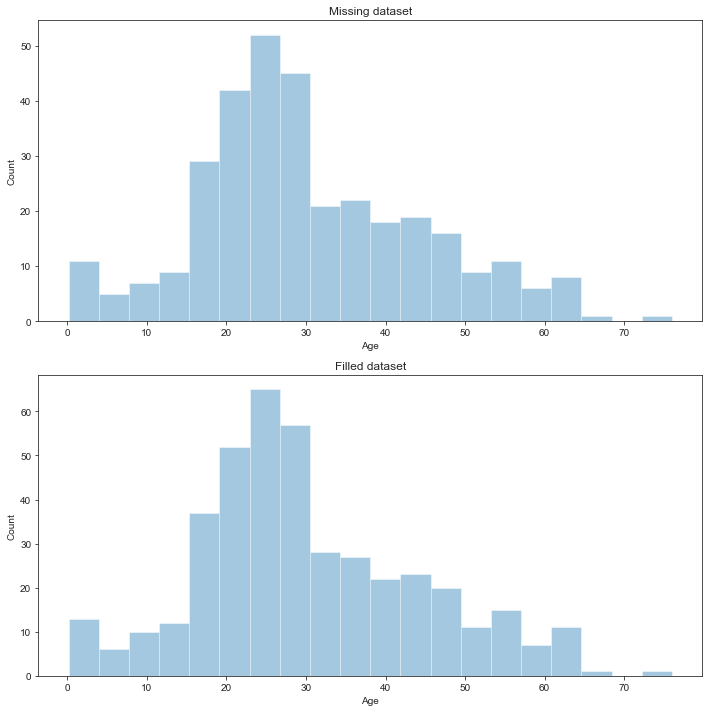

In [22]:

sns.set_style('ticks')
fig,(ax1,ax2)=plt.subplots(2,1,figsize=(10,10))
sns.distplot(test['Age'],ax=ax1,bins=20,kde=False,)
ax1.set_title('Missing dataset')
ax1.set_xlabel('Age')
ax1.set_ylabel('Count')
sns.distplot(test_copy['Age'],ax=ax2,bins=20,kde=False)
ax2.set_title('Filled dataset')
ax2.set_xlabel('Age')
ax2.set_ylabel('Count')
plt.tight_layout()

In [23]:
# Fare 
# Value of Fare is varies depending upon Pclass which is taken by passenger

test_copy[test_copy['Fare'].isna()]['Pclass']

152    3
Name: Pclass, dtype: int64

In [24]:
Fare3class=test_copy[test_copy['Pclass']==3]['Fare'].mean()
test_copy['Fare'].fillna(value=Fare3class,inplace=True)

In [25]:
test_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           418 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


##  Outlier detection

In [26]:
def Outlier_Detecter(data,feature):
    Q1=data[feature].quantile(0.25)
    Q3=data[feature].quantile(0.75)
    IQR=Q3-Q1
    Lower_lim=Q1-1.5*IQR
    Upper_lim=Q3+1.5*IQR
    return data[(data[feature] < Lower_lim ) & (data[feature] > Upper_lim)]

In [27]:
print(Outlier_Detecter(train_copy,'Age'))

Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked]
Index: []


In [28]:
print(Outlier_Detecter(train_copy,'Fare'))

Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked]
Index: []


In [29]:
print(Outlier_Detecter(test_copy,'Age'))

Empty DataFrame
Columns: [PassengerId, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked]
Index: []


In [30]:
print(Outlier_Detecter(test_copy,'Fare'))

Empty DataFrame
Columns: [PassengerId, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked]
Index: []


> **There is no outliers present in the dataset**

##  Feature Creation

In [31]:
train_copy.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [32]:
train_copy['Title']=train_copy['Name'].apply(lambda x:x.split()[1])

In [33]:
train_copy.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs.
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr.


In [34]:
test_copy.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [35]:
test_copy['Title']=test_copy['Name'].apply(lambda x:x.split()[1])

In [36]:
test_copy.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr.
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs.
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr.
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr.
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs.


In [37]:
#Considering the important features that helps to predict the target variable 
#Pclass
#Sex
#Age
#SibSp
#Parch
#Fare
#Embarked
#Title

#'PassengerId' doesn't useful for machine learning. the reason for the selection explained later

In [38]:
train_data=train_copy[['PassengerId','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked','Title']]

In [39]:
train_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,3,male,22.0,1,0,7.2500,S,Mr.
1,2,1,female,38.0,1,0,71.2833,C,Mrs.
2,3,3,female,26.0,0,0,7.9250,S,Miss.
3,4,1,female,35.0,1,0,53.1000,S,Mrs.
4,5,3,male,35.0,0,0,8.0500,S,Mr.


## Categorical to Numerical

### Train Categorical to numerical

#### Sex

In [40]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
train_data['Sex']=le.fit_transform(train_data['Sex'])

C:\Users\Nandhu\miniconda3\envs\study\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [41]:
train_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,3,1,22.0,1,0,7.2500,S,Mr.
1,2,1,0,38.0,1,0,71.2833,C,Mrs.
2,3,3,0,26.0,0,0,7.9250,S,Miss.
3,4,1,0,35.0,1,0,53.1000,S,Mrs.
4,5,3,1,35.0,0,0,8.0500,S,Mr.


#### Embarked

In [42]:
from category_encoders import BinaryEncoder
bde=BinaryEncoder(cols='Embarked')
train_data=bde.fit_transform(train_data)

In [43]:

train_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_0,Embarked_1,Embarked_2,Title
0,1,3,1,22.0,1,0,7.2500,0,0,1,Mr.
1,2,1,0,38.0,1,0,71.2833,0,1,0,Mrs.
2,3,3,0,26.0,0,0,7.9250,0,0,1,Miss.
3,4,1,0,35.0,1,0,53.1000,0,0,1,Mrs.
4,5,3,1,35.0,0,0,8.0500,0,0,1,Mr.


#### Title

bde=BinaryEncoder(cols='Title')
train_data=bde.fit_transform(train_data)

train_data.head()

### Test Categorical to Numerical

####  Sex

In [44]:
test_data=test_copy[['PassengerId','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked','Title']]
test_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,male,34.5,0,0,7.8292,Q,Mr.
1,893,3,female,47.0,1,0,7.0000,S,Mrs.
2,894,2,male,62.0,0,0,9.6875,Q,Mr.
3,895,3,male,27.0,0,0,8.6625,S,Mr.
4,896,3,female,22.0,1,1,12.2875,S,Mrs.


In [45]:

test_data['Sex']=le.fit_transform(test_data['Sex'])

C:\Users\Nandhu\miniconda3\envs\study\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


####  Embarked

In [46]:
from category_encoders import BinaryEncoder
bde=BinaryEncoder(cols='Embarked')
test_data=bde.fit_transform(test_data)

####  Title

bde=BinaryEncoder(cols='Title')
test_data=bde.fit_transform(test_data)

##  Train Test Split

In [47]:
y_train=train_copy['Survived']
y_test=gender['Survived']

In [48]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [49]:
x_test=test_data
x_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_0,Embarked_1,Embarked_2,Title
0,892,3,1,34.5,0,0,7.8292,0,0,1,Mr.
1,893,3,0,47.0,1,0,7.0000,0,1,0,Mrs.
2,894,2,1,62.0,0,0,9.6875,0,0,1,Mr.
3,895,3,1,27.0,0,0,8.6625,0,1,0,Mr.
4,896,3,0,22.0,1,1,12.2875,0,1,0,Mrs.


In [50]:
x_train=train_data
x_train.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_0,Embarked_1,Embarked_2,Title
0,1,3,1,22.0,1,0,7.2500,0,0,1,Mr.
1,2,1,0,38.0,1,0,71.2833,0,1,0,Mrs.
2,3,3,0,26.0,0,0,7.9250,0,0,1,Miss.
3,4,1,0,35.0,1,0,53.1000,0,0,1,Mrs.
4,5,3,1,35.0,0,0,8.0500,0,0,1,Mr.


## Importing Machine Learning algorithms and Metrics

In [51]:

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import accuracy_score,f1_score,classification_report, precision_score, confusion_matrix, roc_auc_score,roc_curve, recall_score
import xgboost
from xgboost import XGBClassifier


In [52]:
# Creating empty data frame to save the model results

Results=pd.DataFrame(columns=['Model','Accuracy','F1 score','Precision score', 'Roc & Auc score', 'Roc curve', 'Recall score'])

## Logistic Regression Initial

In [53]:
def fLogR(Model,x_train,x_test,y_train,y_test):
    global Results
    # Initializing the algorithm
    LR=LogisticRegression(max_iter=500)
    
    
    # Fitting the data into the algorithm
    lr=LR.fit(x_train,y_train)
    
    # Predicting the output for test dataset
    y_predict=lr.predict(x_test)
    
    
    # Evaluation of the model 
    
    cm=confusion_matrix(y_test,y_predict)
    print(cm)
    print(classification_report(y_test,y_predict))
    
    Accuracy=accuracy_score(y_test,y_predict)
    F1_score =f1_score(y_test,y_predict)
    Precision_score =precision_score(y_test,y_predict)
    Roc_Auc_score=roc_auc_score(y_test,y_predict)
    Roc_curve=roc_curve(y_test,y_predict)
    Recall_score=recall_score(y_test,y_predict)
    
    # Saving the model scores in dataframe (Results)
    Results=Results.append({'Model':Model,'Accuracy':Accuracy,'F1 score':F1_score,'Precision score':Precision_score, 'Roc & Auc score':Roc_Auc_score, 'Roc curve':Roc_curve, 'Recall score':Recall_score},ignore_index=True)
    
    return Results.set_index('Model').loc[Model]
  

## Decision Tree Initial

In [54]:
def fDT(Model,x_train,x_test,y_train,y_test):
    
    global Results
    
    # Initializing the algorithm
    DT=DecisionTreeClassifier()
    
    # Fitting the data into the algorithm
    DT=DT.fit(x_train,y_train)
    
    # Predicting the output for test dataset
    y_predict=DT.predict(x_test)
    
    
    # Evaluation of the model 
    
    cm=confusion_matrix(y_test,y_predict)
    print(cm)
    print(classification_report(y_test,y_predict))
    
    Accuracy=accuracy_score(y_test,y_predict)
    F1_score =f1_score(y_test,y_predict)
    Precision_score =precision_score(y_test,y_predict)
    Roc_Auc_score=roc_auc_score(y_test,y_predict)
    Roc_curve=roc_curve(y_test,y_predict)
    Recall_score=recall_score(y_test,y_predict)
    
    # Saving the model scores in dataframe (Results)
    Results=Results.append({'Model':Model,'Accuracy':Accuracy,'F1 score':F1_score,'Precision score':Precision_score, 'Roc & Auc score':Roc_Auc_score, 'Roc curve':Roc_curve, 'Recall score':Recall_score},ignore_index=True)
    
    return Results.set_index('Model').loc[Model]

## Naive Bayes Initial

In [55]:
def fNB(Model,x_train,x_test,y_train,y_test):
    
    global Results
    
    # Initializing the algorithm
    NB=GaussianNB()
    
    # Fitting the data into the algorithm
    NB=NB.fit(x_train,y_train)
    
    # Predicting the output for test dataset
    y_predict=NB.predict(x_test)
    
    
    # Evaluation of the model 
    
    cm=confusion_matrix(y_test,y_predict)
    print(cm)
    print(classification_report(y_test,y_predict))
    
    Accuracy=accuracy_score(y_test,y_predict)
    F1_score =f1_score(y_test,y_predict)
    Precision_score =precision_score(y_test,y_predict)
    Roc_Auc_score=roc_auc_score(y_test,y_predict)
    Roc_curve=roc_curve(y_test,y_predict)
    Recall_score=recall_score(y_test,y_predict)
    
    # Saving the model scores in dataframe (Results)
    Results=Results.append({'Model':Model,'Accuracy':Accuracy,'F1 score':F1_score,'Precision score':Precision_score, 'Roc & Auc score':Roc_Auc_score, 'Roc curve':Roc_curve, 'Recall score':Recall_score},ignore_index=True)
    
    return Results.set_index('Model').loc[Model]

## K- Nearest Neighbors Initial

In [56]:
def fKNN(Model,x_train,x_test,y_train,y_test):
    
    global Results
    
    # Initializing the algorithm
    KNN=KNeighborsClassifier()

    
    # Fitting the data into the algorithm
    KNN=KNN.fit(x_train,y_train)
    
    # Predicting the output for test dataset
    y_predict=KNN.predict(x_test)
    
    
    # Evaluation of the model 
    
    cm=confusion_matrix(y_test,y_predict)
    print(cm)
    print(classification_report(y_test,y_predict))
    
    Accuracy=accuracy_score(y_test,y_predict)
    F1_score =f1_score(y_test,y_predict)
    Precision_score =precision_score(y_test,y_predict)
    Roc_Auc_score=roc_auc_score(y_test,y_predict)
    Roc_curve=roc_curve(y_test,y_predict)
    Recall_score=recall_score(y_test,y_predict)
    
    # Saving the model scores in dataframe (Results)
    Results=Results.append({'Model':Model,'Accuracy':Accuracy,'F1 score':F1_score,'Precision score':Precision_score, 'Roc & Auc score':Roc_Auc_score, 'Roc curve':Roc_curve, 'Recall score':Recall_score},ignore_index=True)
    
    return Results.set_index('Model').loc[Model]

##  XGBoost Initial

In [57]:
def fXGB(Model,x_train,x_test,y_train,y_test):
    
    global Results
    
    # Initializing the algorithm
    XG=XGBClassifier()

    
    # Fitting the data into the algorithm
    XG=XG.fit(x_train,y_train)
    
    # Predicting the output for test dataset
    y_predict=XG.predict(x_test)
    
    
    # Evaluation of the model 
    
    cm=confusion_matrix(y_test,y_predict)
    print(cm)
    print(classification_report(y_test,y_predict))
    
    Accuracy=accuracy_score(y_test,y_predict)
    F1_score =f1_score(y_test,y_predict)
    Precision_score =precision_score(y_test,y_predict)
    Roc_Auc_score=roc_auc_score(y_test,y_predict)
    Roc_curve=roc_curve(y_test,y_predict)
    Recall_score=recall_score(y_test,y_predict)
    
    # Saving the model scores in dataframe (Results)
    Results=Results.append({'Model':Model,'Accuracy':Accuracy,'F1 score':F1_score,'Precision score':Precision_score, 'Roc & Auc score':Roc_Auc_score, 'Roc curve':Roc_curve, 'Recall score':Recall_score},ignore_index=True)
    
    return Results.set_index('Model').loc[Model]

In [58]:
# Logistic Regression
fLogR('Logistic Regression noFeng',x_train,x_test,y_train,y_test)

ValueError: could not convert string to float: 'Mr.'

In [ ]:
# Naive Bayes
fNB('Naive Bayes noFeng',x_train,x_test,y_train,y_test)

In [ ]:
# Decision Tree
fDT('Decision tree noFeng',x_train,x_test,y_train,y_test)

In [ ]:
# K nearest neighbors
fKNN('K-nearest Neighbors noFeng',x_train,x_test,y_train,y_test)

In [ ]:
# XGBoost
fXGB('XGBoost noFeng',x_train,x_test,y_train,y_test)

In [ ]:
Results.head()

In [ ]:
sns.heatmap(Results.set_index('Model')[['Accuracy','F1 score','Precision score','Roc & Auc score','Recall score']],annot=True)

## Feature Engineering 

In [ ]:
test['Fare']>285.000,'Fare'